# Intervalos de confiança e testes de hipóteses
---------------

## Intervalos de confiança

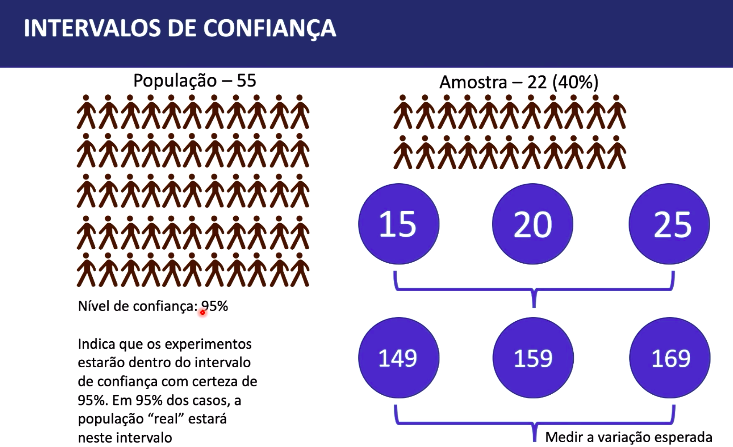

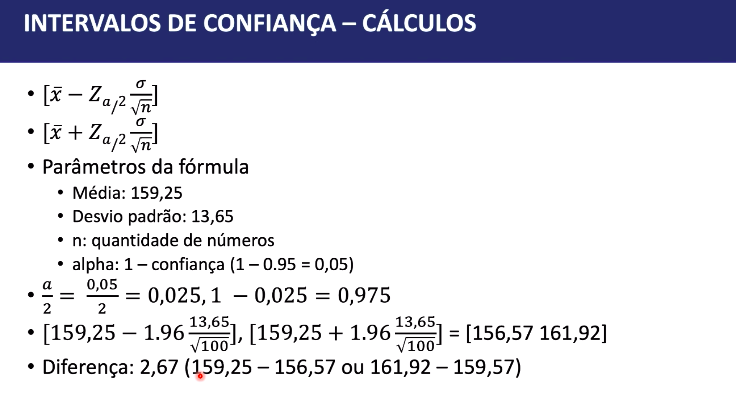

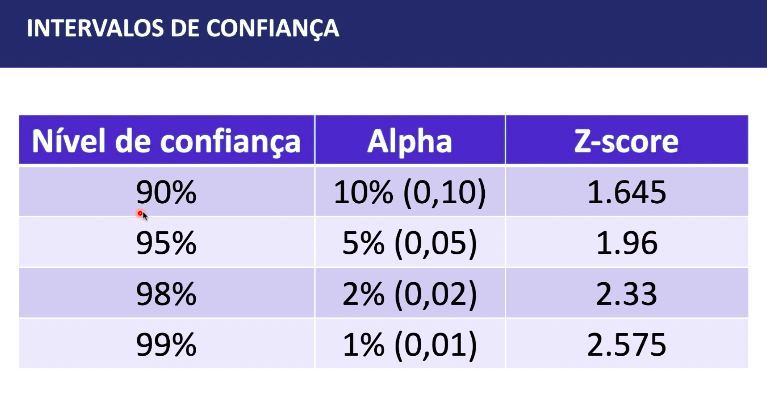

##  Intervalos de confiança - implementação

In [146]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

sns.set()

In [147]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [148]:
n = len(dados)
n

100

In [149]:
media = np.mean(dados)
media

159.25

In [150]:
desvio_padrao = np.std(dados)
desvio_padrao

13.65

## Cálculo do intervalo de confiança - manual

In [151]:
# 1 - 0.95 = 0.05
alpha = 0.05 / 2
alpha

0.025

In [152]:
1 - alpha

0.975

In [153]:
z = norm.ppf(1 - alpha)
z

1.959963984540054

In [154]:
x_inferior = media - z * (desvio_padrao / math.sqrt(n))
x_inferior

156.57464916110283

In [155]:
x_superior = media + z * (desvio_padrao / math.sqrt(n))
x_superior

161.92535083889717

In [156]:
margem_erro = abs(media - x_superior)
margem_erro

2.675350838897174

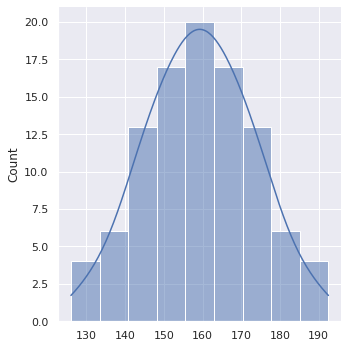

In [157]:
sns.displot(dados, kde=True);

## Cálculo do intervalo de confiança - scipy

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [158]:
stats.sem(dados)

1.3718766178288244

In [159]:
desvio_padrao / math.sqrt(n - 1)

1.3718766178288246

In [160]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(156.5611712378229, 161.9388287621771)

In [161]:
margem_erro = media - intervalos[0]
margem_erro

2.68882876217711

## Diferentes níveis de confiança

In [162]:
intervalos = norm.interval(0.99, media, stats.sem(dados))
intervalos

(155.71628000694295, 162.78371999305705)

In [163]:
margem_erro = media - intervalos[0]
margem_erro

3.5337199930570478

In [164]:
intervalos = norm.interval(0.8, media, stats.sem(dados))
intervalos

(157.49186937268743, 161.00813062731257)

In [165]:
margem_erro = media - intervalos[0]
margem_erro

1.7581306273125676

## Exercício

In [166]:
dados_salario = np.array([82.1191, 72.8014, 79.1266, 71.3552, 59.192 , 79.1952, 56.518 ,
                          70.3752, 73.5364, 61.0407, 64.3902, 66.4076, 63.5215, 71.9936,
                          60.1489, 78.5932, 76.0459, 67.7726, 64.6149, 80.1948, 76.7998,
                          76.1831, 80.7065, 62.4953, 57.204 , 62.5408, 80.0982, 63.287 ,
                          66.5826, 79.3674])

In [167]:
media = dados_salario.mean()
media

70.14025666666666

In [168]:
desvio_padrao = dados_salario.std()
desvio_padrao

7.899834598255137

In [169]:
intervalos = norm.interval(0.95, media, stats.sem(dados_salario))
intervalos

(67.26506308375339, 73.01545024957993)

In [170]:
# Temos 95% de confiança de que a média salarial das pessoas está
# no intervalo entre 67.26 e 73.01

## Distribuição T Student - teoria

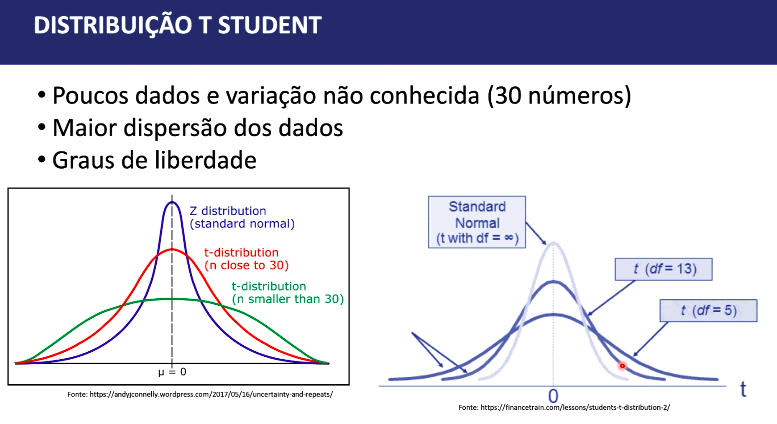

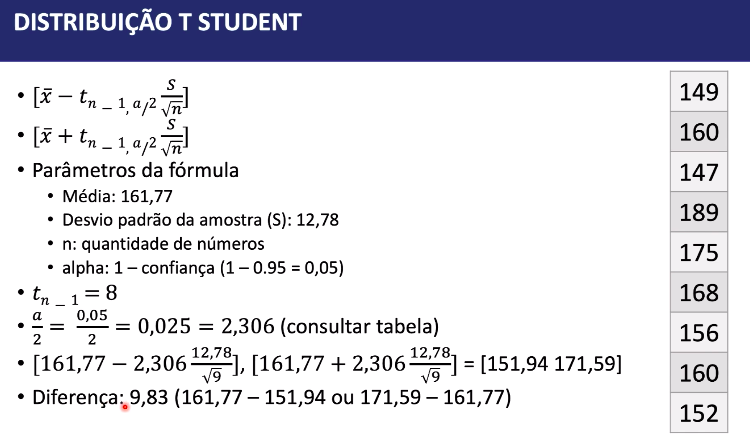

## Distribuição T Student - implementação

In [171]:
dados = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])
dados

array([149., 160., 147., 189., 175., 168., 156., 160., 152.])

In [172]:
n = len(dados)
n

9

In [173]:
media = dados.mean()
media

161.77777777777777

In [174]:
desvio_padrao = np.std(dados)
desvio_padrao

12.786953227391823

In [175]:
from scipy.stats import t

In [176]:
intervalos = t.interval(0.95, n - 1, media, stats.sem(dados, ddof=0))
intervalos

(151.9488554388298, 171.60670011672573)

In [177]:
margem_erro = media - intervalos[0]
margem_erro

9.828922338947962

## Intervalos de confiança em machine learning

### Accuracy

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [179]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/credit_data.csv'

In [180]:
dataset = pd.read_csv(path)
dataset.dropna(inplace=True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [181]:
x = dataset.iloc[:, 1:4].values
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [182]:
y = dataset['c#default'].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [183]:
resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  
  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, x, y, cv = kfold)
  resultados_naive_bayes_cv_300.append(scores)
  resultados_naive_bayes_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, x, y, cv = kfold)
  resultados_logistica_cv_300.append(scores)
  resultados_logistica_cv.append(scores.mean())
  
  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, x, y, cv = kfold)
  resultados_forest_cv_300.append(scores)
  resultados_forest_cv.append(scores.mean())

In [184]:
len(resultados_naive_bayes_cv), len(resultados_naive_bayes_cv_300)

(30, 30)

In [185]:
print(resultados_naive_bayes_cv)

[0.9248618090452261, 0.9249170854271356, 0.9248894472361808, 0.9228819095477387, 0.9248718592964824, 0.9253894472361809, 0.9243844221105528, 0.9248894472361808, 0.9248718592964824, 0.9238894472361808, 0.9253844221105527, 0.9244020100502512, 0.9253743718592965, 0.924394472361809, 0.9253869346733667, 0.9248819095477387, 0.9258844221105527, 0.924894472361809, 0.9238819095477387, 0.9258844221105529, 0.9258944723618091, 0.9253894472361811, 0.92436432160804, 0.9263844221105527, 0.9228944723618092, 0.9253894472361809, 0.9248869346733668, 0.9253919597989949, 0.9253819095477386, 0.9258844221105527]


In [186]:
print(resultados_naive_bayes_cv_300)

[array([0.91      , 0.93      , 0.96      , 0.925     , 0.94      ,
       0.895     , 0.965     , 0.89949749, 0.87939698, 0.94472362]), array([0.92      , 0.945     , 0.895     , 0.92      , 0.915     ,
       0.93      , 0.89      , 0.94974874, 0.93467337, 0.94974874]), array([0.93      , 0.89      , 0.94      , 0.935     , 0.905     ,
       0.935     , 0.935     , 0.91959799, 0.94472362, 0.91457286]), array([0.91      , 0.945     , 0.95      , 0.94      , 0.92      ,
       0.9       , 0.9       , 0.90954774, 0.91959799, 0.93467337]), array([0.96      , 0.93      , 0.94      , 0.905     , 0.935     ,
       0.93      , 0.905     , 0.90452261, 0.89949749, 0.93969849]), array([0.915     , 0.91      , 0.945     , 0.945     , 0.9       ,
       0.935     , 0.925     , 0.96482412, 0.89949749, 0.91457286]), array([0.955     , 0.935     , 0.915     , 0.94      , 0.905     ,
       0.9       , 0.925     , 0.92462312, 0.92462312, 0.91959799]), array([0.94      , 0.92      , 0.925     , 0.91

In [187]:
np.asarray(resultados_naive_bayes_cv_300).shape

(30, 10)

In [188]:
resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

In [189]:
resultados_naive_bayes_cv_300.shape

(300,)

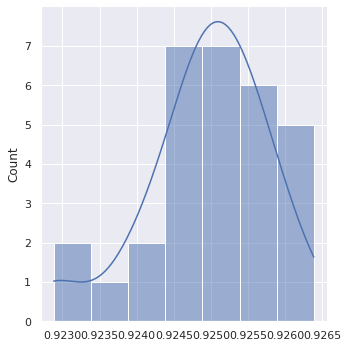

In [190]:
sns.displot(resultados_naive_bayes_cv, kde=True);

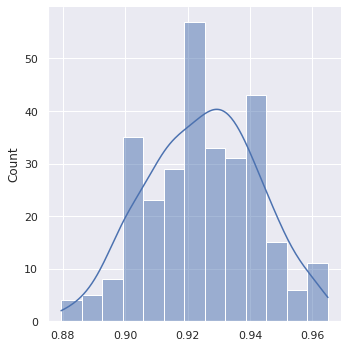

In [191]:
sns.displot(resultados_naive_bayes_cv_300, kde=True);

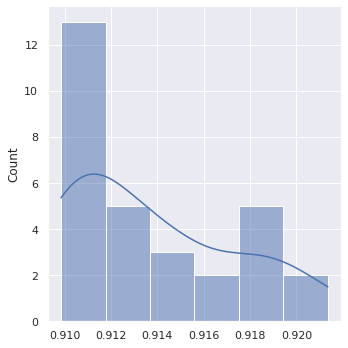

In [192]:
sns.displot(resultados_logistica_cv, kde=True);

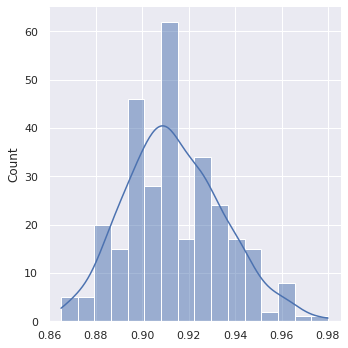

In [193]:
sns.displot(resultados_logistica_cv_300, kde=True);

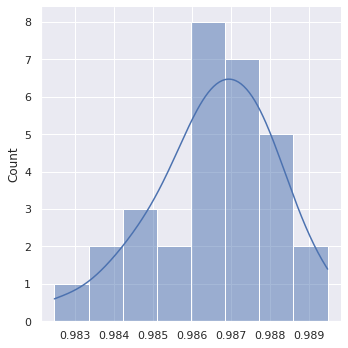

In [194]:
sns.displot(resultados_forest_cv, kde=True);

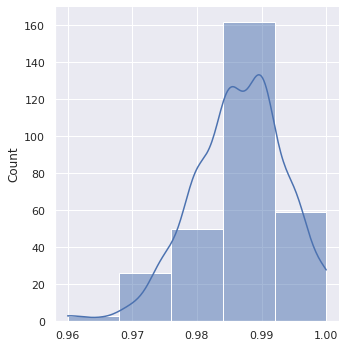

In [195]:
sns.displot(resultados_forest_cv_300, kde=True, bins=5);

In [196]:
(resultados_naive_bayes_cv.mean(),
 resultados_logistica_cv.mean(),
 resultados_forest_cv.mean())

(0.9249359296482411, 0.9137817420435511, 0.9865969849246231)

In [197]:
# Naive bayes é o algoritmo mais consitente
(stats.variation(resultados_naive_bayes_cv) * 100, 
 stats.variation(resultados_logistica_cv) * 100,
 stats.variation(resultados_forest_cv) * 100)

(0.08641071566366061, 0.38801026116292653, 0.1554573770785295)

### Intervalos de confiança

In [198]:
from scipy.stats import t
from scipy.stats import norm

#### Naïve bayes

In [199]:
intervalos_naive_bayes_t = t.interval(0.95, len(resultados_naive_bayes_cv) - 1,
                                      resultados_naive_bayes_cv.mean(),
                                      stats.sem(resultados_naive_bayes_cv, ddof=0))
intervalos_naive_bayes_t

(0.9246374871248957, 0.9252343721715865)

In [200]:
# Margem de erro
abs(resultados_naive_bayes_cv.mean() - intervalos_naive_bayes_t[1]) 

0.0002984425233454324

In [201]:
intervalos_naive_bayes_n = norm.interval(0.95, resultados_naive_bayes_cv_300.mean(),
                                         stats.sem(resultados_naive_bayes_cv_300))
intervalos_naive_bayes_n

(0.9229333893644709, 0.9269384699320113)

In [202]:
# Margem de erro
abs(resultados_naive_bayes_cv_300.mean() - intervalos_naive_bayes_n[1])

0.0020025402837702266

#### Regressão logística

In [203]:
intervalos_logistica_t = t.interval(0.95, len(resultados_logistica_cv) - 1,
                                      resultados_logistica_cv.mean(),
                                      stats.sem(resultados_logistica_cv, ddof=0))
intervalos_logistica_t

(0.9124578055959317, 0.9151056784911705)

In [204]:
# Margem de erro
abs(resultados_logistica_cv.mean() - intervalos_logistica_t[1])

0.0013239364476194115

In [205]:
intervalos_logistica_n = norm.interval(0.95, resultados_logistica_cv_300.mean(),
                                      stats.sem(resultados_logistica_cv_300))
intervalos_logistica_n

(0.9114192660020396, 0.9161442180850629)

In [206]:
# Margem de erro
abs(resultados_logistica_cv_300.mean() - intervalos_logistica_n[1])

0.0023624760415116297

#### Random Forest

In [207]:
intervalos_forest_t = t.interval(0.95, len(resultados_forest_cv) - 1,
                                      resultados_forest_cv.mean(),
                                      stats.sem(resultados_forest_cv, ddof=0))
intervalos_forest_t

(0.9860242778197551, 0.9871696920294911)

In [208]:
# Margem de erro
abs(resultados_forest_cv.mean() - intervalos_forest_t[1])

0.0005727071048680088

In [209]:
intervalos_forest_n = norm.interval(0.95, resultados_forest_cv.mean(),
                                      stats.sem(resultados_forest_cv_300))
intervalos_forest_n

(0.9857854210646465, 0.9874085487845997)

In [210]:
# Margem de erro
abs(resultados_forest_cv_300.mean() - intervalos_forest_n[1])

0.0008115638599766051

In [211]:
# Temos 95% de confiança de que a média de acertos do Random Forest está
# no intervalo entre 98,63% e 98,74% - 98,59% e 98,77%

In [212]:
kfold = KFold(n_splits = 10, shuffle = True)
random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest, x, y, cv = kfold)
print(scores.mean())

0.9874824120603016


## Teste de hipótese

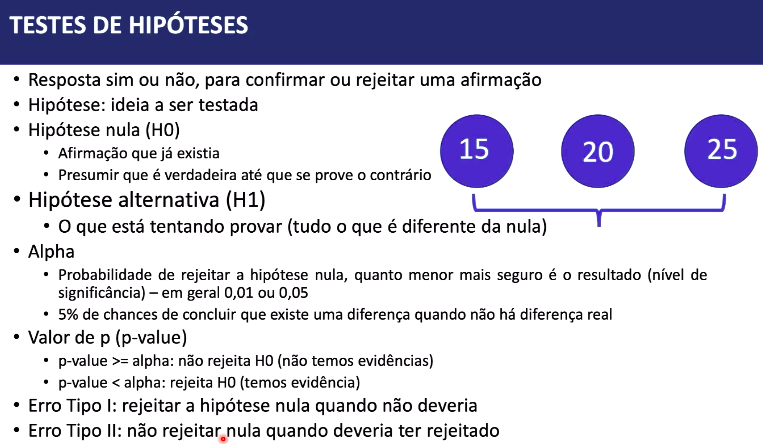

## Teste de hipótese Z - cálculo

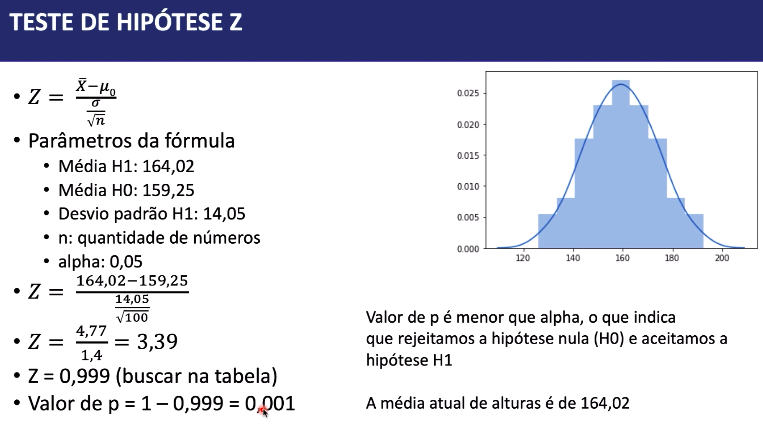

## Teste de hipótese Z - implementação

In [213]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                            150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                            154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                            157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                            161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                            164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                            168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                            171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [214]:
H0_media = np.mean(dados_originais)
H0_media

159.25

In [215]:
H0_desvio_padrao = np.std(dados_originais)
H0_desvio_padrao

13.65

In [216]:
dados_novos = dados_originais * 1.03
dados_novos

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [217]:
H1_media = np.mean(dados_novos)
H1_media

164.0275

In [218]:
H1_desvio_padrao = np.std(dados_novos)
H1_desvio_padrao

14.0595

In [219]:
H1_n = len(dados_novos)
H1_n

100

In [220]:
alpha = 0.05

## Teste de hipótese Z

### Teste manual

In [221]:
z = (H1_media - H0_media) / (H1_desvio_padrao / math.sqrt(H1_n))
z

3.398058252427187

In [222]:
norm.cdf(z), norm.ppf(norm.cdf(z))

(0.9996606701617486, 3.3980582524271936)

In [223]:
Z = norm.cdf(z)
Z

0.9996606701617486

In [224]:
p = 1 - Z
p

0.00033932983825135654

In [225]:
if p < alpha:
  print('Hipótese Nula rejeitada (H0)')
else:
  print('Hipótese Alternativa rejeitada (H1)')

Hipótese Nula rejeitada (H0)


### Teste com o statsmodels

- https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.ztest.html

In [226]:
from statsmodels.stats.weightstats import ztest

In [227]:
_, p = ztest(dados_originais,
             dados_novos,
             value=H1_media-H0_media,
             alternative='larger')
p

0.9999993877283934

In [228]:
P = 1 - p
P

6.12271606637016e-07

In [229]:
if P < alpha:
  print('Hipótese Nula rejeitada (H0)')
else:
  print('Hipótese Alternativa rejeitada (H1)')

Hipótese Nula rejeitada (H0)


## Teste de hipótese T

In [230]:
dados_originais = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [231]:
h0_media = np.mean(dados_originais)
h0_media

161.77777777777777

In [232]:
h0_desvio_padrao = np.std(dados_originais)
h0_desvio_padrao

12.786953227391823

In [233]:
novos_dados = dados_originais * 1.02
novos_dados

array([151.98, 163.2 , 149.94, 192.78, 178.5 , 171.36, 159.12, 163.2 ,
       155.04])

In [234]:
novos_dados.mean(), novos_dados.std()

(165.01333333333332, 13.042692291939664)

In [235]:
from scipy.stats import ttest_rel

In [236]:
_, p = ttest_rel(dados_originais, novos_dados)
p

4.072922493930298e-10

In [237]:
alpha = 0.01
if p <= alpha:
  print('Hipótese Nula rejeitada (H0)')
else:
  print('Hipótese Alternativa rejeitada (H1)')

Hipótese Nula rejeitada (H0)


## Qui Quadrado - cálculo

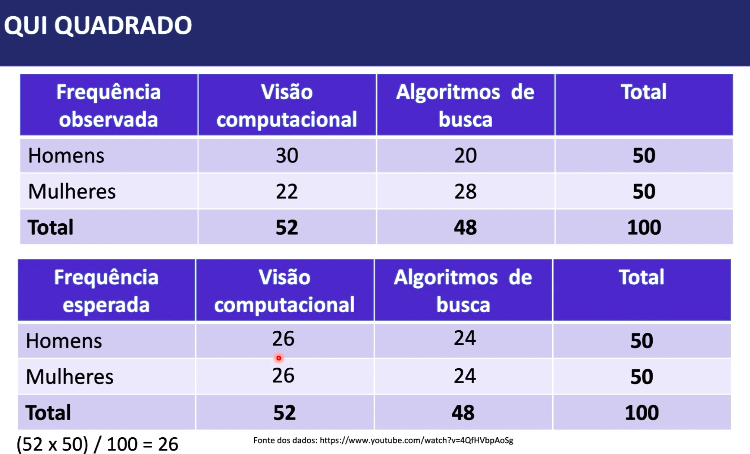

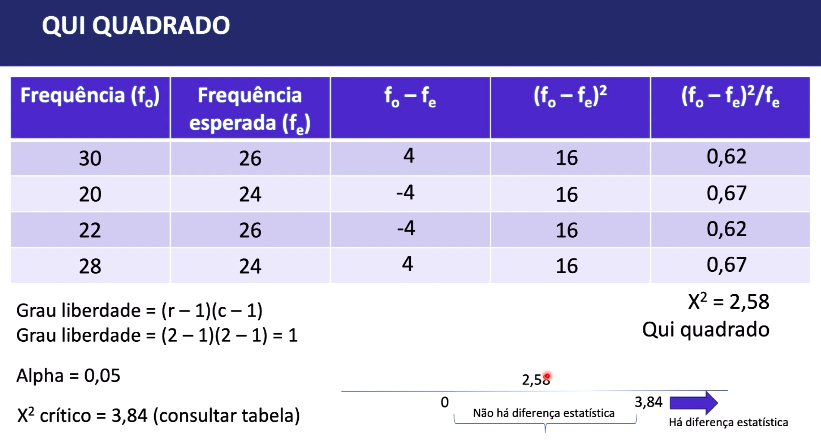

## Qui Quadrado - implementação

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [238]:
from scipy.stats import chi2_contingency

In [239]:
# tabela = np.array([[30, 20],
#                    [22, 28]])
tabela = np.array([[45, 5],
                   [5, 45]])

In [240]:
tabela.shape

(2, 2)

In [241]:
chi2_contingency(tabela)

(60.84, 6.190717543917382e-15, 1, array([[25., 25.],
        [25., 25.]]))

In [242]:
_, p, _, _ = chi2_contingency(tabela)

In [243]:
alpha = 0.05
if p <= alpha:
  print('Hipótese Nula rejeitada (H0)')
else:
  print('Hipótese Alternativa rejeitada (H1)')

Hipótese Nula rejeitada (H0)


## Seleção de atributos com testes de hipóteses - univariate SelectFdr

Testes estatísticos univariados são aqueles que envolvem uma variável dependente, por exemplo, teste t ou teste z para comparação de médias

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr

False discovery rate: https://en.wikipedia.org/wiki/False_discovery_rate

Proporção esperada de erros do tipo I. Um erro do tipo I é quando a hipótese nula é rejeitada incorretamente, ou seja, é obtido um falso positivo

Erro I: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/type-i-error-type-ii-error-decision/

In [244]:
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [245]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/ad.data'
dataset = pd.read_csv(path, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.


In [246]:
dataset.shape

(3279, 1559)

In [247]:
x = dataset.iloc[:, :-1].values
x

array([[125.    , 125.    ,   1.    , ...,   0.    ,   0.    ,   0.    ],
       [ 57.    , 468.    ,   8.2105, ...,   0.    ,   0.    ,   0.    ],
       [ 33.    , 230.    ,   6.9696, ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 23.    , 120.    ,   5.2173, ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [ 40.    ,  40.    ,   1.    , ...,   0.    ,   0.    ,   0.    ]])

In [248]:
y = dataset.iloc[:, -1:].values.reshape(-1)
y

array(['ad.', 'ad.', 'ad.', ..., 'nonad.', 'nonad.', 'nonad.'],
      dtype=object)

In [249]:
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 459, 2820]))

In [250]:
naive1 = GaussianNB()

In [251]:
naive1.fit(x, y)
previsoes1 = naive1.predict(x)
accuracy_score(y, previsoes1)

0.7813357731015553

In [252]:
selecao = SelectFdr(chi2, alpha=0.01)

In [253]:
x_novo = selecao.fit_transform(x, y)

In [254]:
x.shape, x_novo.shape

((3279, 1558), (3279, 433))

In [255]:
selecao.pvalues_, len(selecao.pvalues_)

(array([2.14710304e-268, 0.00000000e+000, 8.98165813e-150, ...,
        6.03353380e-041, 5.63437216e-012, 9.37945775e-002]), 1558)

In [256]:
np.sum(selecao.pvalues_ <= 0.01)

476

In [257]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, ...,  True,  True, False])

In [258]:
indices = np.where(colunas == True)
indices

(array([   0,    1,    2,    9,   11,   14,   20,   21,   26,   31,   34,
          36,   49,   58,   59,   64,   65,   69,   70,   86,   91,   95,
          96,  102,  104,  106,  113,  133,  134,  139,  155,  158,  163,
         167,  172,  175,  180,  181,  183,  185,  186,  189,  190,  192,
         193,  224,  242,  246,  248,  249,  251,  259,  264,  265,  266,
         267,  268,  269,  270,  274,  276,  278,  287,  290,  293,  304,
         307,  310,  312,  317,  321,  329,  330,  336,  341,  345,  346,
         350,  351,  355,  356,  357,  359,  366,  367,  370,  372,  381,
         386,  388,  389,  398,  405,  418,  420,  426,  427,  429,  430,
         432,  435,  440,  455,  457,  460,  465,  470,  472,  477,  478,
         482,  508,  511,  518,  528,  532,  533,  540,  542,  548,  551,
         556,  572,  573,  574,  576,  586,  622,  625,  627,  638,  643,
         648,  653,  658,  661,  663,  666,  683,  688,  694,  703,  704,
         709,  711,  720,  723,  729, 

In [259]:
naive2 = GaussianNB()
naive2.fit(x_novo, y)
previsoes2 = naive2.predict(x_novo)
accuracy_score(y, previsoes2)

0.970722781335773

## ANOVA - análise de variância - teoria

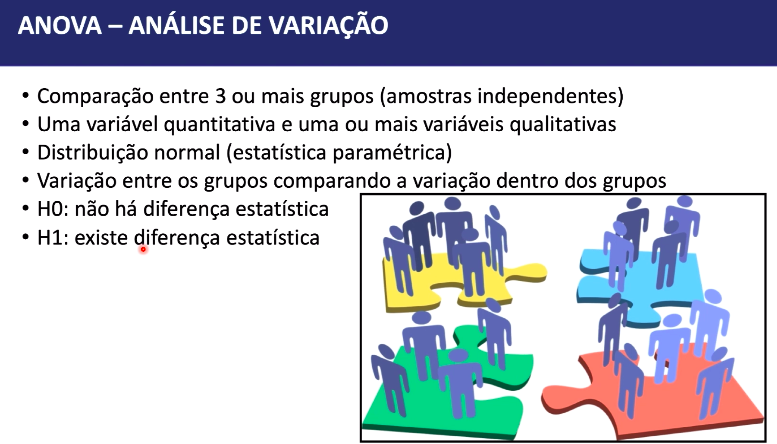

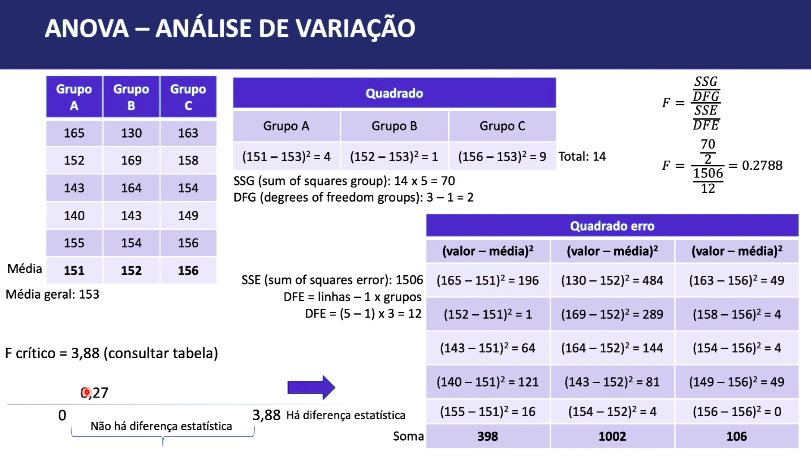

## ANOVA - análise de variância - implementação

In [260]:
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

In [261]:
from scipy.stats import f
from scipy.stats import f_oneway

In [262]:
f.ppf(1 - 0.05, dfn=2, dfd=12)

3.8852938346523933

In [263]:
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

0.7613994386091956

In [264]:
alpha = 0.05
if p <= alpha:
  print('Hipótese Nula rejeitada (H0)')
else:
  print('Hipótese Alternativa rejeitada (H1)')

Hipótese Alternativa rejeitada (H1)


### Teste de Tukey

In [265]:
dados = {'valores': [165, 152, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [266]:
dados = {'valores': [70, 90, 80, 50, 20, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [267]:
dados_pd = pd.DataFrame(dados)
dados_pd

,valores,grupo
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [268]:
from statsmodels.stats.multicomp import MultiComparison

In [269]:
compara_grupos = MultiComparison(dados_pd['valores'], dados_pd['grupo'])

In [270]:
teste = compara_grupos.tukeyhsd()
print(teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B     90.0 0.001  58.494 121.506   True
     A      C     94.0 0.001  62.494 125.506   True
     B      C      4.0   0.9 -27.506  35.506  False
---------------------------------------------------


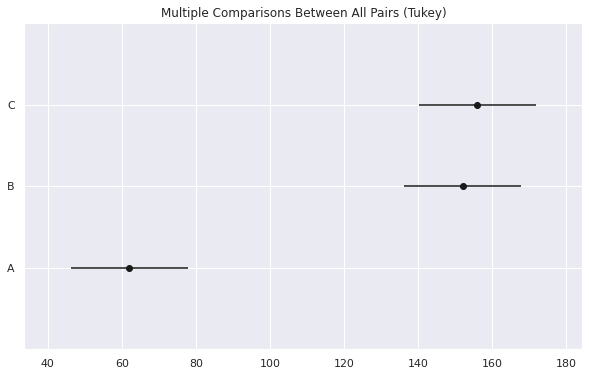

In [271]:
teste.plot_simultaneous();

## ANOVA - seleção de atributos

In [272]:
from sklearn.feature_selection import f_classif

In [273]:
selecao = SelectFdr(f_classif, alpha=0.01)
x_novo_2 = selecao.fit_transform(x, y)

In [274]:
x.shape, x_novo.shape, x_novo_2.shape

((3279, 1558), (3279, 433), (3279, 433))

In [275]:
selecao.pvalues_

array([1.31095977e-005, 1.19510994e-200, 4.91337302e-016, ...,
       1.35872010e-042, 3.77636040e-012, 9.35989125e-002])

In [276]:
np.sum(selecao.pvalues_ < 0.01)

476

In [277]:
naive3 = GaussianNB()
naive3.fit(x_novo_2, y)
previsoes3 = naive3.predict(x_novo_2)
accuracy_score(y, previsoes3)

0.970722781335773

## Resultados dos algoritmos de machine learning

In [278]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [279]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/credit_data.csv'
dataset = pd.read_csv(path)
dataset.dropna(inplace=True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [280]:
x = dataset.iloc[:, 1:4].values
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [281]:
y = dataset['c#default'].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [282]:
min(x[0]), max(x[0])

(59.017015066929204, 66155.9250950813)

In [283]:
from sklearn.preprocessing import StandardScaler

In [284]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [285]:
min(x[0]), max(x[0])

(1.2019070702053862, 1.4538977547824534)

In [287]:
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  
  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, x, y, cv = kfold)
  resultados_naive_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, x, y, cv = kfold)
  resultados_logistica_cv.append(scores.mean())  
  
  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, x, y, cv = kfold)
  resultados_forest_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

In [288]:
resultados_naive_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9249859296482411, 0.9457008375209381, 0.9867803182579565)

### Teste de hipótese de Shapiro-Wilk

- https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [289]:
alpha = 0.05

In [290]:
from scipy.stats import shapiro

In [291]:
shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv)

((0.9646671414375305, 0.4051830470561981),
 (0.9463143944740295, 0.13459184765815735),
 (0.9489253163337708, 0.15820631384849548))

In [293]:
import seaborn as sns

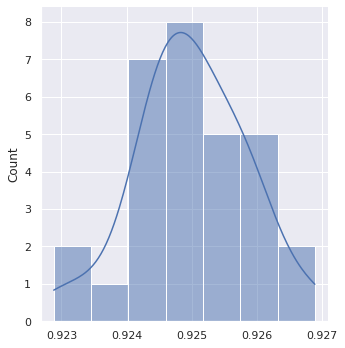

In [294]:
sns.displot(resultados_naive_cv, kde=True);

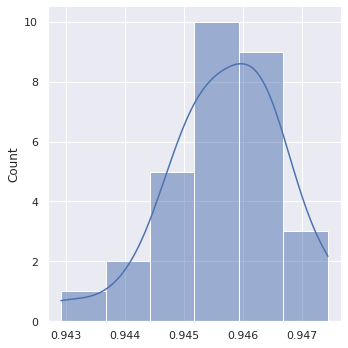

In [295]:
sns.displot(resultados_logistica_cv, kde=True);

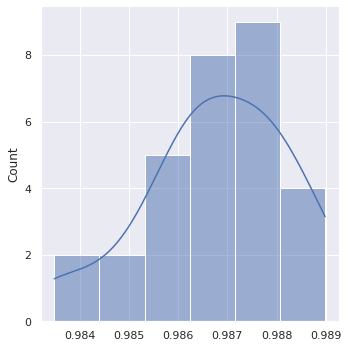

In [296]:
sns.displot(resultados_forest_cv, kde=True);

### Teste de hipótese de D'Agostinho K^2

- https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test

In [297]:
from scipy.stats import normaltest

In [298]:
normaltest(resultados_naive_cv), normaltest(resultados_logistica_cv), normaltest(resultados_forest_cv)

(NormaltestResult(statistic=0.8391668731677201, pvalue=0.6573205784978502),
 NormaltestResult(statistic=4.079254883823804, pvalue=0.1300771631514313),
 NormaltestResult(statistic=1.9440856835632343, pvalue=0.3783094218912576))

### Teste de hipótese de Anderson-Darling

- https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test

In [299]:
from scipy.stats import anderson

In [300]:
(anderson(resultados_naive_cv).statistic,
 anderson(resultados_logistica_cv).statistic,
 anderson(resultados_forest_cv).statistic)

(0.5456346672421049, 0.6048933015735969, 0.45024048363391955)

### Testes não paramétricos

- https://www.statisticshowto.com/parametric-and-non-parametric-data/#:~:text=Nonparametric%20tests%20can%20perform%20well,20%20items%20in%20each%20group).

If at all possible, you should us parametric tests, as they tend to be more accurate. Parametric tests have greater statistical power, which means they are likely to find a true significant effect. Use nonparametric tests only if you have to (i.e. you know that assumptions like normality are being violated). Nonparametric tests can perform well with non-normal continuous data if you have a sufficiently large sample size (generally 15-20 items in each group).

### Teste de Wilcoxon Signed-Rank

- https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

In [301]:
alpha = 0.05

In [302]:
from scipy.stats import wilcoxon

In [303]:
_, p = wilcoxon(resultados_naive_cv, resultados_logistica_cv)
p

1.7333066441991056e-06

In [304]:
_, p = wilcoxon(resultados_naive_cv, resultados_forest_cv)
p

1.732216233144114e-06

In [305]:
_, p = wilcoxon(resultados_logistica_cv, resultados_forest_cv)
p

1.7343976283205784e-06

### Teste de Friedman

- https://en.wikipedia.org/wiki/Friedman_test
- Teste de Nemenyi: https://en.wikipedia.org/wiki/Nemenyi_test

In [306]:
from scipy.stats import friedmanchisquare

In [307]:
_, p =friedmanchisquare(resultados_naive_cv, 
                        resultados_logistica_cv, 
                        resultados_forest_cv)
p

9.357622968840163e-14

## ANOVA e Tukey - algoritmos

In [ ]:
from scipy.stats import f_oneway

In [308]:
_, p = f_oneway(resultados_naive_cv,
                resultados_logistica_cv,
                resultados_forest_cv)
p

3.096138257703761e-119

In [309]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Dados são diferentes


In [313]:
lista = ['naive'] * len(resultados_naive_cv) + ['logistic'] * len(resultados_logistica_cv) + ['forest'] * len(resultados_forest_cv)

In [315]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_naive_cv, 
                                                    resultados_logistica_cv,
                                                    resultados_forest_cv]),
                         'algoritmo': lista}

In [316]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.924862,naive
1,0.924917,naive
2,0.924387,naive
3,0.922882,naive
4,0.924872,naive
...,...,...
85,0.986490,forest
86,0.984977,forest
87,0.986480,forest
88,0.988492,forest


In [317]:
from statsmodels.stats.multicomp import MultiComparison

In [318]:
compara_grupos = MultiComparison(resultados_algoritmos['accuracy'], resultados_algoritmos['algoritmo'])

In [319]:
teste = compara_grupos.tukeyhsd()
print(teste)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
  forest logistic  -0.0411 0.001 -0.0418 -0.0404   True
  forest    naive  -0.0618 0.001 -0.0625 -0.0611   True
logistic    naive  -0.0207 0.001 -0.0214   -0.02   True
-------------------------------------------------------


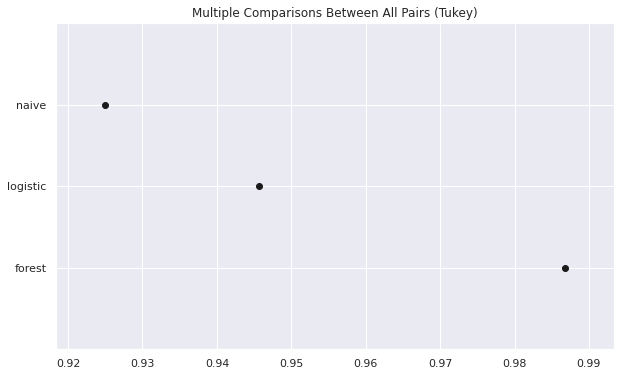

In [320]:
teste.plot_simultaneous();

## Geração do arquivo com os resultados para o teste de Nemenyi

In [321]:
resultados_algoritmos = {'naive_bayes': resultados_naive_cv,
                         'logistica': resultados_logistica_cv,
                         'random_forest': resultados_forest_cv}

In [322]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,naive_bayes,logistica,random_forest
0,0.924862,0.946427,0.985972
1,0.924917,0.946402,0.986485
2,0.924387,0.946417,0.983475
3,0.922882,0.944910,0.987472
4,0.924872,0.945915,0.986480
5,0.925889,0.942917,0.986485
6,0.924384,0.944912,0.987475
7,0.924889,0.946902,0.985482
8,0.924872,0.945415,0.986975
9,0.923889,0.943927,0.987982


In [323]:
resultados_df.to_excel('resultadosExel.xlsx', sheet_name='resultados')

## Dados não normais

In [324]:
path = '/content/drive/MyDrive/Estatistica_Para_Ciencia_De_Dados/Bases de dados/trip_d1_d2.csv'

In [327]:
dataset = pd.read_csv(path, sep=';')
dataset.head()

,D1,D2
0,0.7928,0.7983
1,0.7926,0.7983
2,0.7925,0.7982
3,0.7928,0.7982
4,0.7928,0.7982


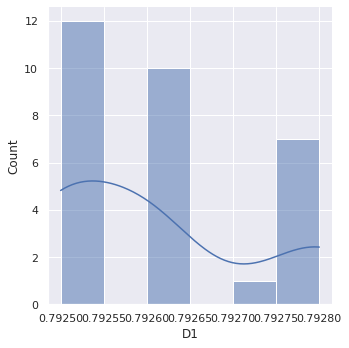

In [328]:
sns.displot(dataset['D1'], kde=True);

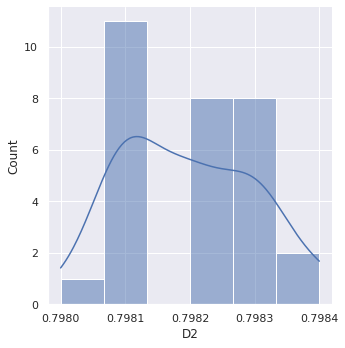

In [329]:
sns.displot(dataset['D2'], kde=True);

In [330]:
from scipy.stats import shapiro

In [331]:
shapiro(dataset['D1']), shapiro(dataset['D2'])

((0.7708877921104431, 2.0186324036330916e-05),
 (0.8890060782432556, 0.004569781478494406))

In [332]:
from scipy.stats import friedmanchisquare

In [333]:
# _, p = friedmanchisquare(dataset['D1'], dataset['D2'])
# p

ValueError: ignored

In [334]:
from scipy.stats import wilcoxon

In [335]:
_, p = wilcoxon(dataset['D1'], dataset['D2'])
p

1.5312284726953685e-06

In [336]:
dataset['D1'].mean(), dataset['D2'].mean()

(0.7926100000000001, 0.798196666666667)